# Perform the following operation on the data set being provided of Used car Analysis-

1. Data Preprocessing
2. Data Visualization
3. Explarotary Data Analysis
4. Feature Selection and Transformation
5. Train-Test-Split
6. Model Creation (eg: Multiple Linear Regression)
7. Model Prediction ( using Linear Regression from sklearn Library)

In [1]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset/Used Car Dataset.csv


# 1. Data preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/used-car-dataset/Used Car Dataset.csv')
# ------------------------------------------------------------------
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)
# ------------------------------------------------------------------
df['car_name'] = df['car_name'].str.replace('-', ' ')
df['car_name'] = df['car_name'].str.split(n=1).str[1]
df[['Company_name', 'Model_name']] = df['car_name'].str.split(n=1, expand=True)
df.drop(columns=['car_name'], inplace=True)
# ------------------------------------------------------------------
df = df[df['ownsership'].str.contains('Owner')]
# ------------------------------------------------------------------
df['registration_year'] = df['registration_year'].str.replace('-', ' ')
df[['reg_month', 'reg_year']] = df['registration_year'].str.split(' ', expand=True)
df.dropna(subset=['reg_year'], inplace=True)
df.drop(columns=['registration_year'], inplace=True)
# --------------------------------------------------------------------
#Filling the missing values with median of the data 
df['mileage(kmpl)'] = df['mileage(kmpl)'].fillna(df['mileage(kmpl)'].quantile(0.5))
df['engine(cc)'] = df['engine(cc)'].fillna(df['engine(cc)'].quantile(0.5))
df['max_power(bhp)'] = df['max_power(bhp)'].fillna(df['max_power(bhp)'].quantile(0.5))
df['torque(Nm)'] = df['torque(Nm)'].fillna(df['torque(Nm)'].quantile(0.5))
# --------------------------------------------------------------------
#Outlier removal 
columns = ['seats', 'mileage(kmpl)', 'kms_driven', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']
thresholds = [0.001, 0.999]

for column in columns:
    min_threshold, max_threshold = df[column].quantile(thresholds)
    df = df[(df[column] < max_threshold) & (df[column] >= min_threshold)]

df.reset_index(drop=True, inplace=True)
# -----------------------------------------------------------------------
df['manufacturing_year'] = df['manufacturing_year'].astype('int64')
# --------------------------------------------------------------------
df = df[['Company_name', 'Model_name', 'reg_month', 'reg_year', 'insurance_validity', 'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission', 'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)']]


In [3]:
def add_century(year):
    if year is not None and 23 < int(year) < 100:
        return '19' + str(year)
    elif year is not None:
        return '20' + str(year)
    else:
        return None

df['reg_year'] = df['reg_year'].apply(add_century)
df['reg_year'] = df['reg_year'].astype('int64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_name        1404 non-null   object 
 1   Model_name          1404 non-null   object 
 2   reg_month           1404 non-null   object 
 3   reg_year            1404 non-null   int64  
 4   insurance_validity  1404 non-null   object 
 5   fuel_type           1404 non-null   object 
 6   seats               1404 non-null   int64  
 7   kms_driven          1404 non-null   int64  
 8   ownsership          1404 non-null   object 
 9   transmission        1404 non-null   object 
 10  manufacturing_year  1404 non-null   int64  
 11  mileage(kmpl)       1404 non-null   float64
 12  engine(cc)          1404 non-null   float64
 13  max_power(bhp)      1404 non-null   float64
 14  torque(Nm)          1404 non-null   float64
 15  price(in lakhs)     1404 non-null   float64
dtypes: float64(

## one hot encoding

In [5]:
encoded_df = df.copy()
label_encoder = LabelEncoder()
object_cols = encoded_df.select_dtypes(include=['object']).columns
encoded_df[object_cols] = encoded_df[object_cols].apply(lambda col: label_encoder.fit_transform(col))

In [6]:
encoded_df.head()

,Company_name,Model_name,reg_month,reg_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,16,133,5,2017,0,2,5,56000,1,0,2017,7.81,2996.0,2996.0,333.0,63.75
1,19,357,4,2021,0,2,5,30615,1,0,2020,17.40,999.0,999.0,9863.0,8.99
2,1,557,11,2018,0,1,5,24000,1,0,2018,20.68,1995.0,1995.0,188.0,23.75
3,9,437,2,2019,0,2,5,18378,1,1,2019,16.50,1353.0,1353.0,13808.0,13.56
4,22,450,1,2019,0,2,5,44900,1,0,2019,14.67,1798.0,1798.0,17746.0,24.00


In [23]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_name        1404 non-null   int64  
 1   Model_name          1404 non-null   int64  
 2   reg_month           1404 non-null   int64  
 3   reg_year            1404 non-null   int64  
 4   insurance_validity  1404 non-null   int64  
 5   fuel_type           1404 non-null   int64  
 6   seats               1404 non-null   int64  
 7   kms_driven          1404 non-null   int64  
 8   ownsership          1404 non-null   int64  
 9   transmission        1404 non-null   int64  
 10  manufacturing_year  1404 non-null   int64  
 11  mileage(kmpl)       1404 non-null   float64
 12  engine(cc)          1404 non-null   float64
 13  max_power(bhp)      1404 non-null   float64
 14  torque(Nm)          1404 non-null   float64
 15  price(in lakhs)     1404 non-null   float64
dtypes: float64(

# 2. Data Visualization
# 3. Exploratorty Data Analysis

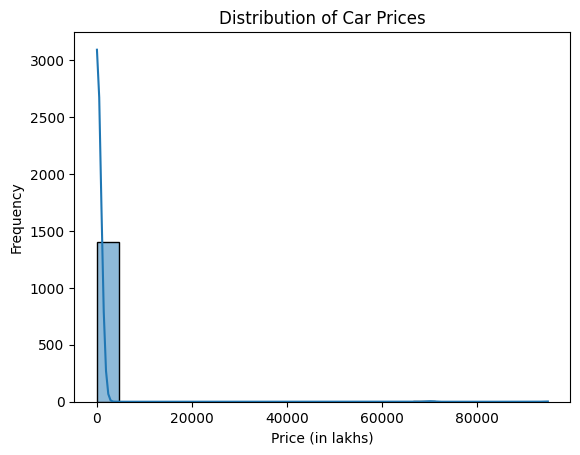

In [24]:
sns.histplot(data=df, x='price(in lakhs)', bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

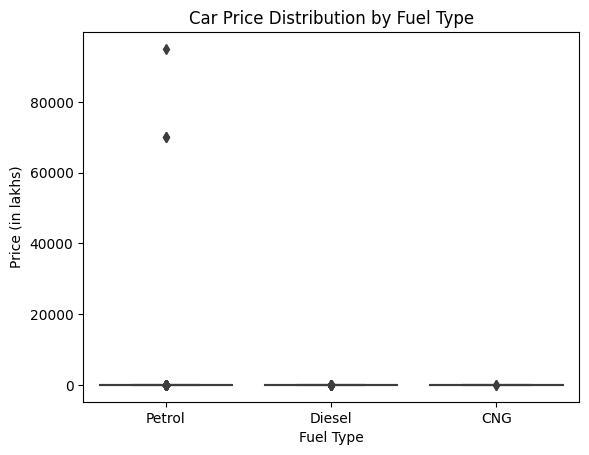

In [8]:
sns.boxplot(data=df, x='fuel_type', y='price(in lakhs)')
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in lakhs)')
plt.show()

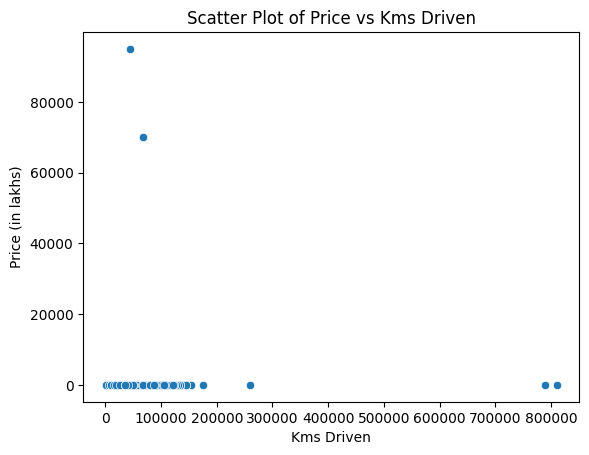

In [9]:
sns.scatterplot(data=df, x='kms_driven', y='price(in lakhs)')
plt.title('Scatter Plot of Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Price (in lakhs)')
plt.show()

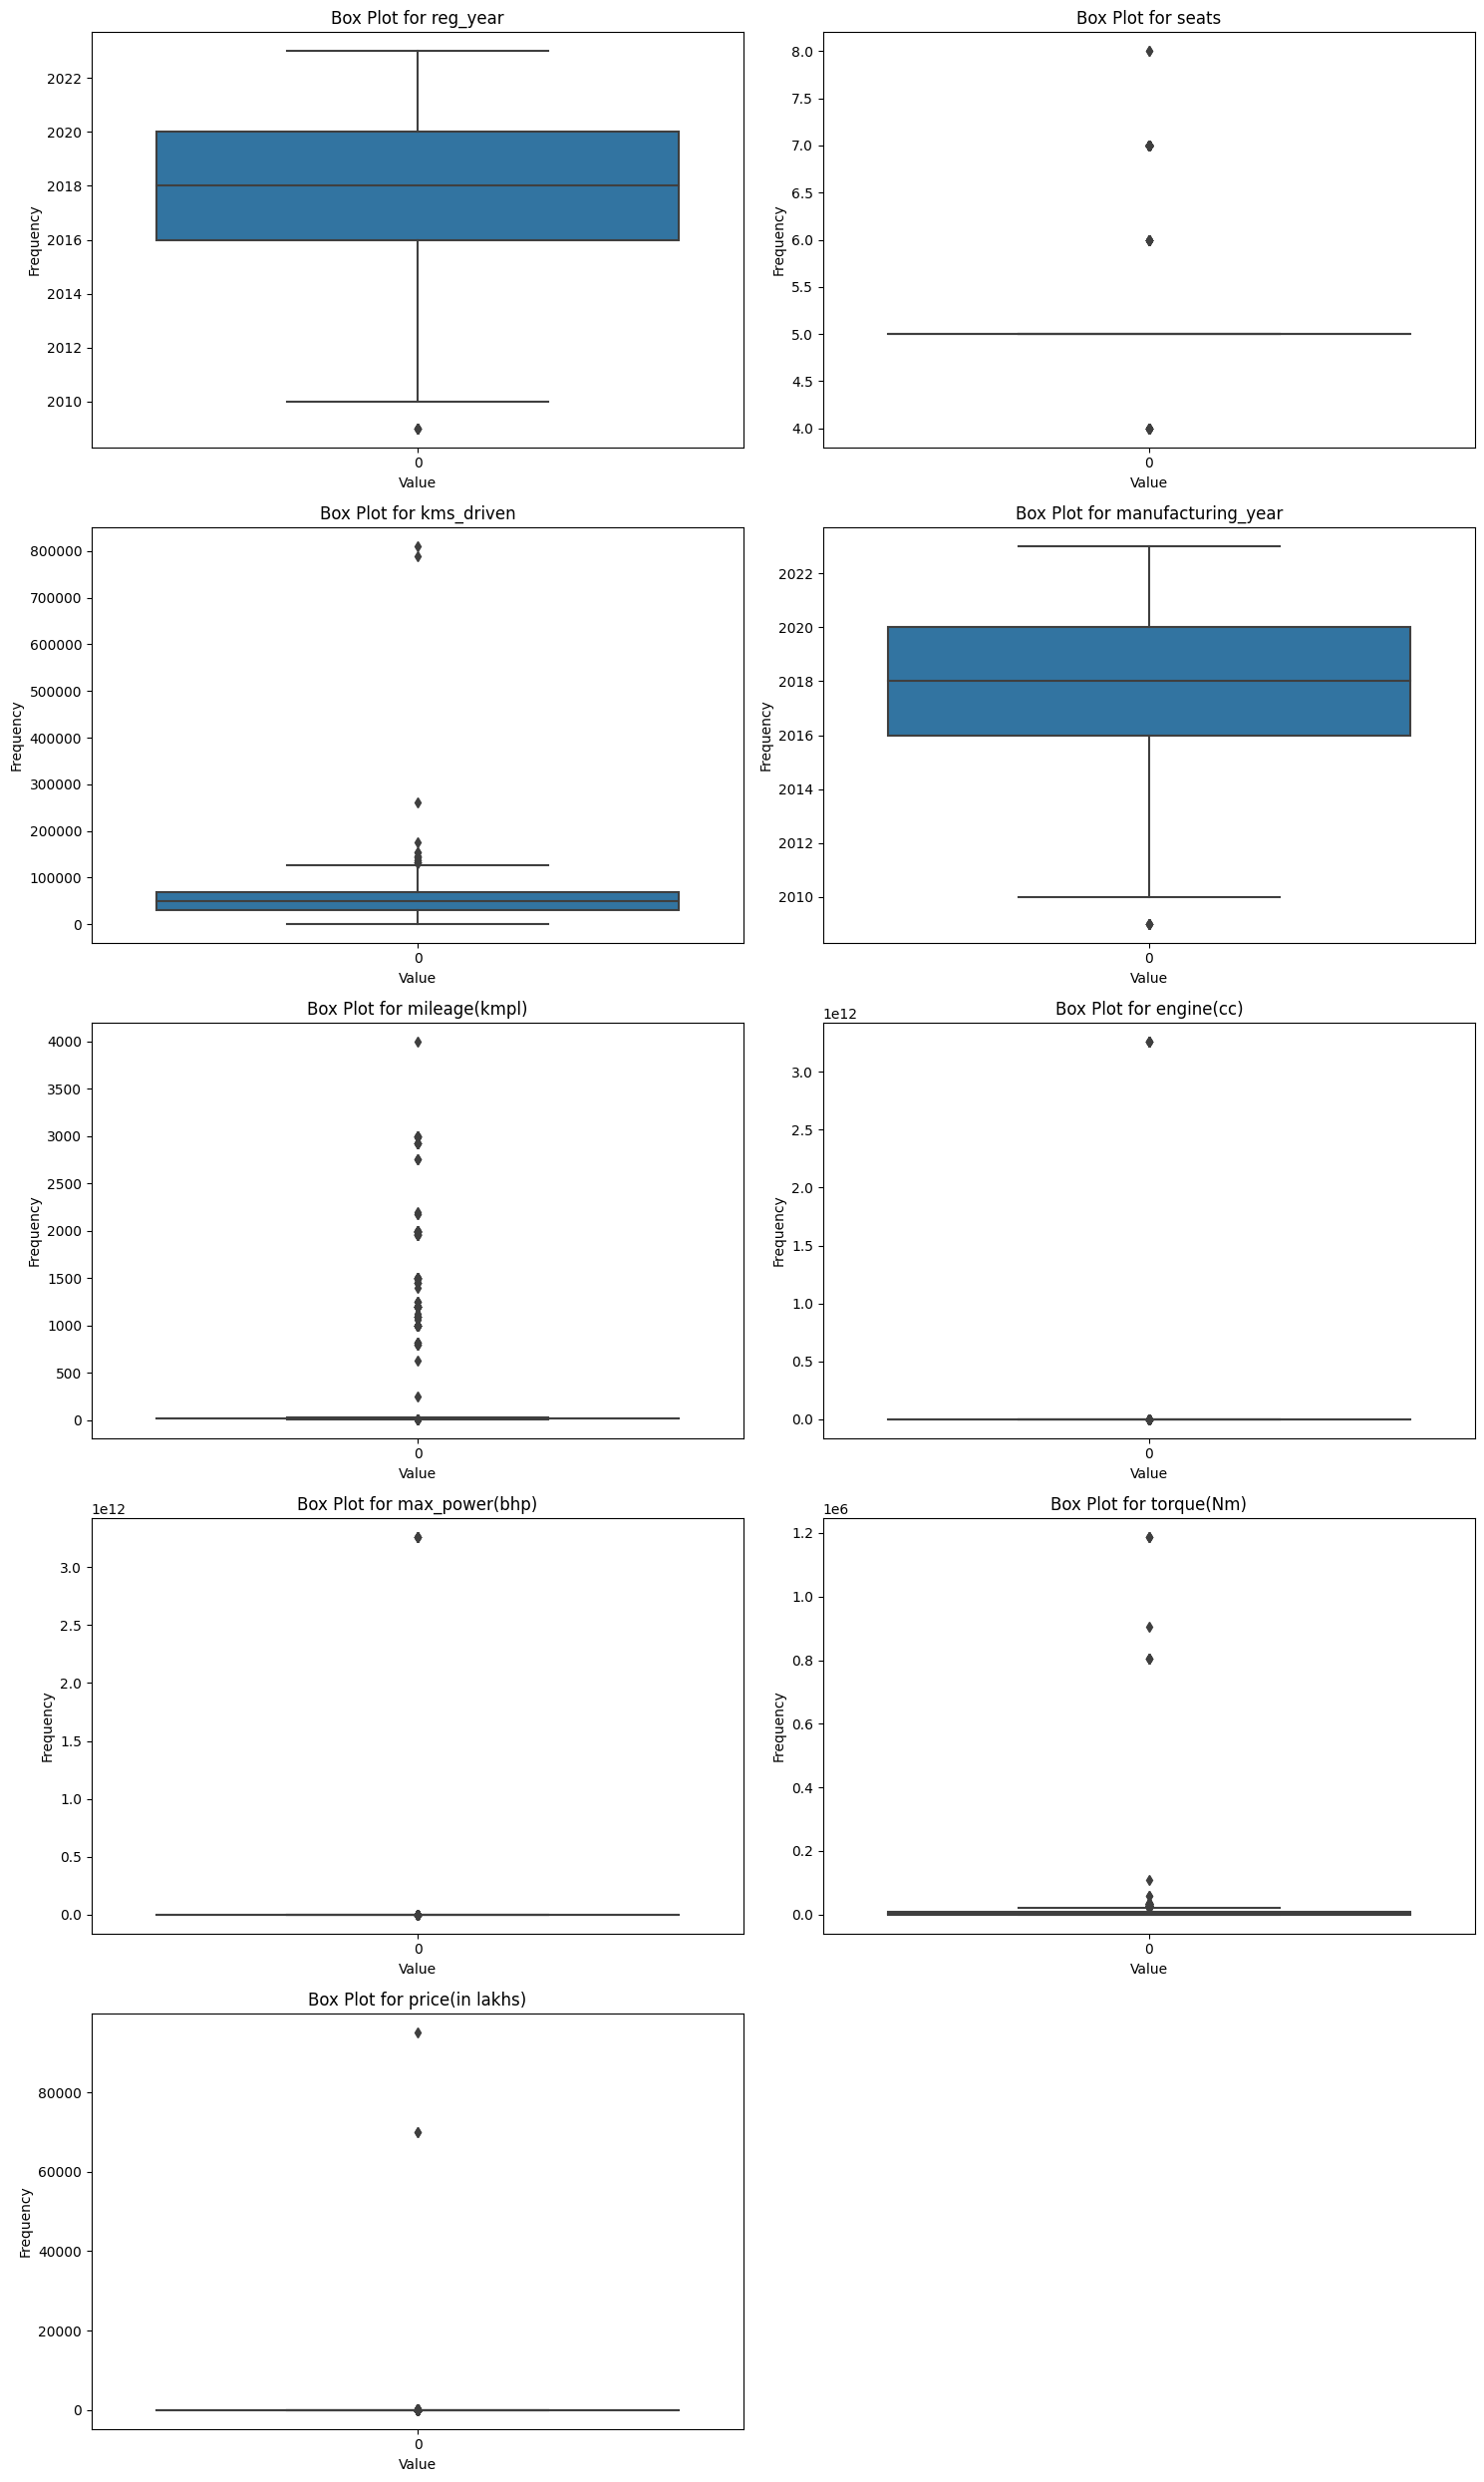

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns + 1) // 2
num_cols = 2
plt.figure(figsize=(15, 5*num_rows))
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

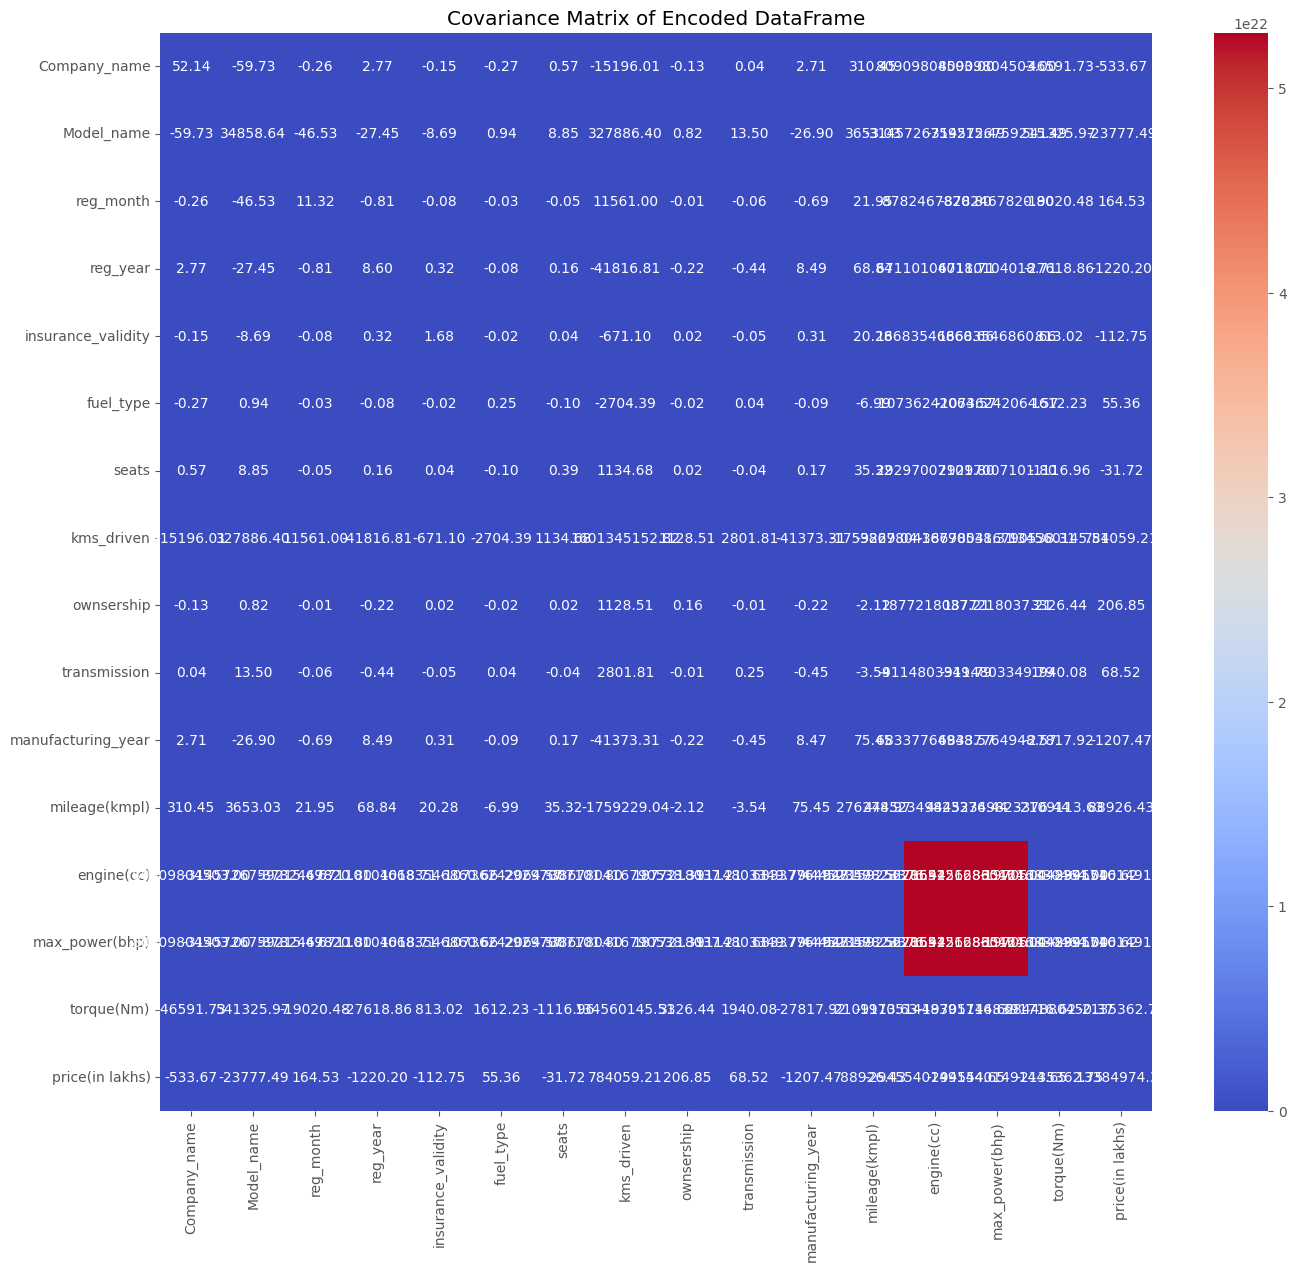

In [133]:
cov_matrix = encoded_df.cov()
plt.figure(figsize=(16, 14))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix of Encoded DataFrame')
plt.show()

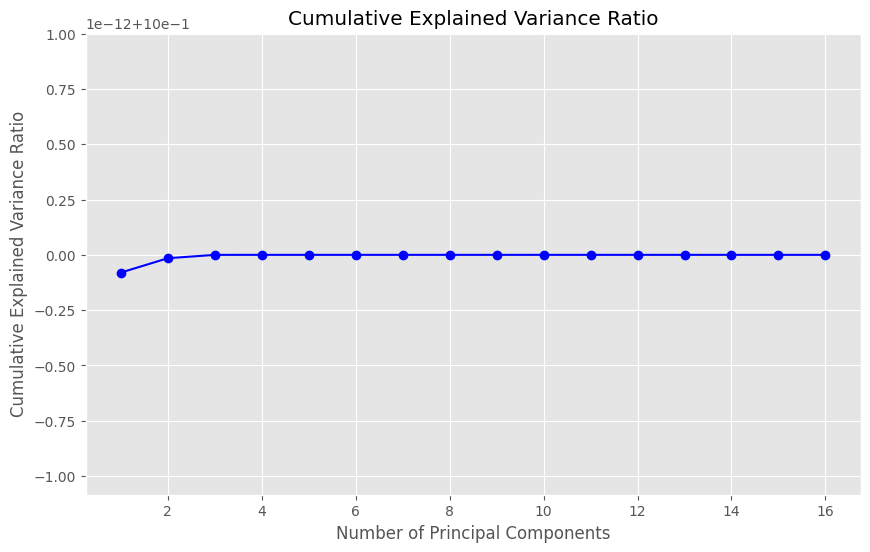

In [143]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(encoded_df)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [25]:
company_counts = df['Company_name'].value_counts()
others_names = company_counts[company_counts < 15].index
df['Company_name'] = df['Company_name'].replace(others_names, 'others')
print(df['Company_name'].value_counts())


Company_name
Maruti        320
Hyundai       286
Honda         161
Mercedes      137
BMW            70
Toyota         59
others         53
Audi           50
Tata           48
Mahindra       40
Ford           33
Kia            27
Volkswagen     24
Renault        23
Land           23
Nissan         18
MG             17
Volvo          15
Name: count, dtype: int64


In [104]:
for column in df.columns:
    print(f'Value counts for column "{column}":')
    print(df[column].value_counts())
    print()

Value counts for column "Company_name":
Company_name
Maruti         320
Hyundai        286
Honda          161
Mercedes       137
BMW             70
Toyota          59
Audi            50
Tata            48
Mahindra        40
Ford            33
Kia             27
Volkswagen      24
Land            23
Renault         23
Nissan          18
MG              17
Volvo           15
Jeep            13
Jaguar          10
Skoda           10
Lexus            5
Datsun           4
Porsche          3
Mini             3
Isuzu            2
Mitsubishi       2
Lamborghini      1
Name: count, dtype: int64

Value counts for column "Model_name":
Model_name
Grand i10 Sportz              20
Grand i10 Magna               18
i20 Sportz 1.2                14
WR V i VTEC VX                14
Swift Dzire VXI               13
                              ..
Ciaz Delta                     1
Benz GLC 220d 4MATIC Sport     1
Vitara Brezza VDi              1
X1 xDrive 20d xLine            1
WR V i VTEC S               

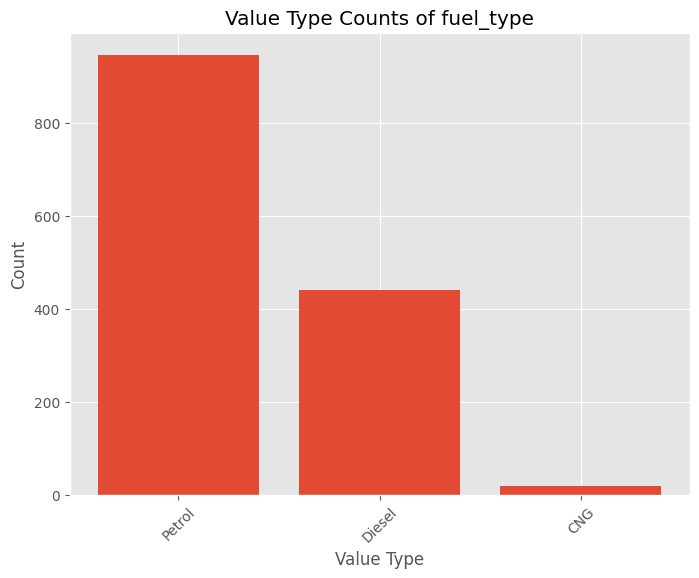

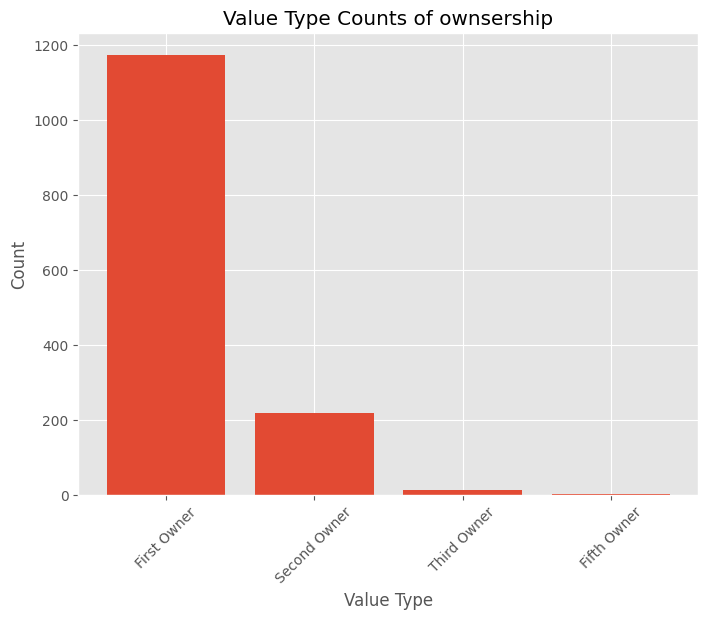

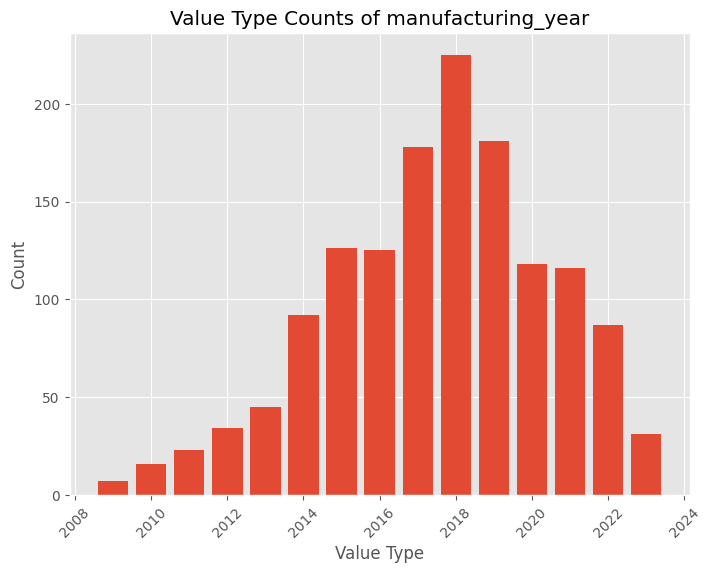

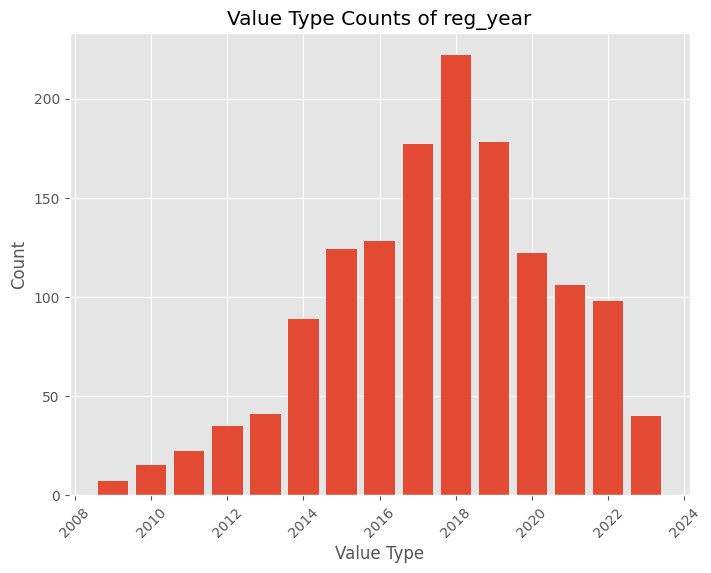

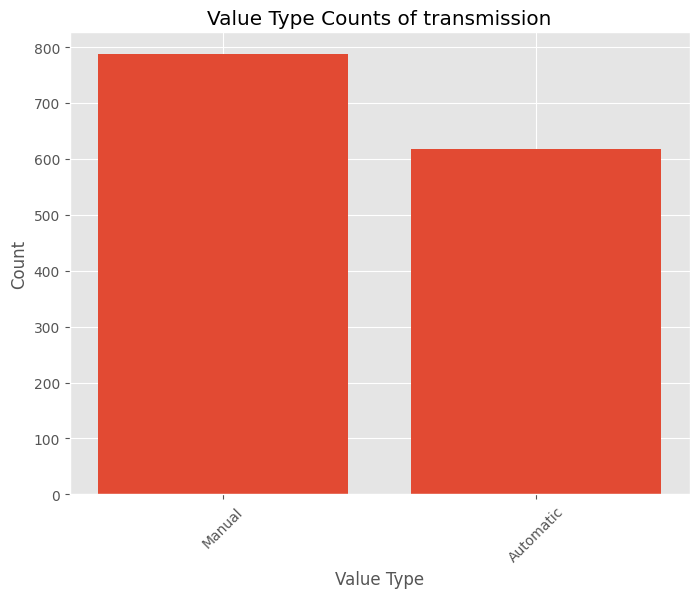

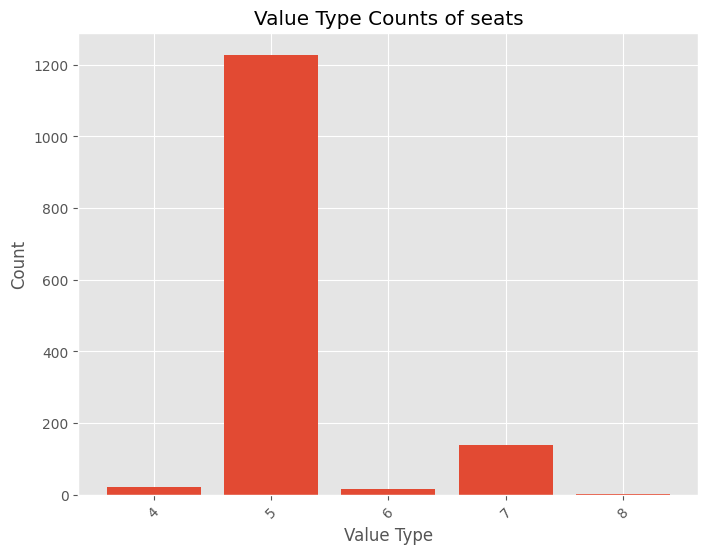

In [105]:
selected_columns = ['fuel_type', 'ownsership','manufacturing_year','reg_year', 'transmission','seats']

for column in selected_columns:
    value_counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Value Type Counts of {column}')
    plt.xlabel('Value Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 4. Feature Selection and Transformation
# 5. Train-Test-Split

In [33]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(columns=['price(in lakhs)'])  # Features
y = encoded_df['price(in lakhs)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (1123, 15)  y: (1123,)
Testing set shape - X: (281, 15)  y: (281,)


# 6. Model Creation (eg: Multiple Linear Regression)
# 7. Model Prediction ( using Linear Regression from sklearn Library)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [28]:
def train_ridge_regression(encoded_df, alpha=1.0, test_size=0.2, random_state=42):
    # Splitting the data into features and target variable
    X = encoded_df.drop(columns=['price(in lakhs)'])
    y = encoded_df['price(in lakhs)']

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Ridge regression model
    ridge = Ridge(alpha=alpha)  # You can tune the alpha hyperparameter

    # Fit the model to the training data
    ridge.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = ridge.predict(X_test_scaled)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    return ridge

In [29]:
trained_ridge_model = train_ridge_regression(encoded_df)

Mean Squared Error: 16795466.42639456


In [35]:
y_test

1198     4.80
576     13.37
746      6.68
752      4.63
1071     7.50
        ...  
1373     3.27
208     45.90
1408     3.95
1348     2.35
425     20.50
Name: price(in lakhs), Length: 281, dtype: float64

In [39]:
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1123 entries, 345 to 1258
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_name        1123 non-null   int64  
 1   Model_name          1123 non-null   int64  
 2   reg_month           1123 non-null   int64  
 3   reg_year            1123 non-null   int64  
 4   insurance_validity  1123 non-null   int64  
 5   fuel_type           1123 non-null   int64  
 6   seats               1123 non-null   int64  
 7   kms_driven          1123 non-null   int64  
 8   ownsership          1123 non-null   int64  
 9   transmission        1123 non-null   int64  
 10  manufacturing_year  1123 non-null   int64  
 11  mileage(kmpl)       1123 non-null   float64
 12  engine(cc)          1123 non-null   float64
 13  max_power(bhp)      1123 non-null   float64
 14  torque(Nm)          1123 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 140.4 KB
<class 'pa

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [43]:
def train_linear_regression(X_train, y_train, X_test, y_test):
    # Initialize the Linear regression model
    linear_reg = LinearRegression()

    # Fit the model to the training data
    linear_reg.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = linear_reg.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Linear Regression Model:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Print first 5 prediction values
    print("First 5 Prediction Values:")
    print(y_pred[:5])

    return y_pred, linear_reg

y_pred_linear_reg, linear_reg_model = train_linear_regression(X_train, y_train, X_test, y_test)


Linear Regression Model:
Mean Squared Error: 16798588.382318567
R2 Score: 0.03282125035762773
First 5 Prediction Values:
[ 700.84369061 -491.22832597 -567.7865104   819.19841275 -568.25052407]


In [44]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    # Initialize the Decision Tree model
    decision_tree = DecisionTreeRegressor()

    # Fit the model to the training data
    decision_tree.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = decision_tree.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Decision Tree Model:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Print first 5 prediction values
    print("First 5 Prediction Values:")
    print(y_pred[:5])

    return y_pred, decision_tree

y_pred_decision_tree, decision_tree_model = train_decision_tree(X_train, y_train, X_test, y_test)


Decision Tree Model:
Mean Squared Error: 32115954.280263692
R2 Score: -0.8490761126721424
First 5 Prediction Values:
[ 4.65 13.37  6.68  4.63  7.99]


In [45]:
def train_random_forest(X_train, y_train, X_test, y_test):
    # Initialize the Random Forest model
    random_forest = RandomForestRegressor()

    # Fit the model to the training data
    random_forest.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = random_forest.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Random Forest Model:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Print first 5 prediction values
    print("First 5 Prediction Values:")
    print(y_pred[:5])

    return y_pred, random_forest

y_pred_random_forest, random_forest_model = train_random_forest(X_train, y_train, X_test, y_test)


Random Forest Model:
Mean Squared Error: 3679553.847448315
R2 Score: 0.7881496820790812
First 5 Prediction Values:
[ 4.1849 13.3743  7.1285  5.2787  7.9959]


In [46]:
def train_gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize the Gradient Boosting model
    gradient_boosting = GradientBoostingRegressor()

    # Fit the model to the training data
    gradient_boosting.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = gradient_boosting.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Gradient Boosting Model:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Print first 5 prediction values
    print("First 5 Prediction Values:")
    print(y_pred[:5])

    return y_pred, gradient_boosting

y_pred_gradient_boosting, gradient_boosting_model = train_gradient_boosting(X_train, y_train, X_test, y_test)


Gradient Boosting Model:
Mean Squared Error: 539791.6636645508
R2 Score: 0.9689214942084081
First 5 Prediction Values:
[5.23760211 5.5847315  6.05024169 4.67377801 5.54158801]


In [48]:
def train_svm(X_train, y_train, X_test, y_test):
    # Initialize the SVM model
    svm_model = SVR()

    # Fit the model to the training data
    svm_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svm_model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Support Vector Machine (SVM) Model:")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Print first 5 prediction values
    print("First 5 Prediction Values:")
    print(y_pred[:5])

    return y_pred, svm_model

y_pred_svm, svm_model = train_svm(X_train, y_train, X_test, y_test)


Support Vector Machine (SVM) Model:
Mean Squared Error: 17434612.207197197
R2 Score: -0.0037978222506604986
First 5 Prediction Values:
[7.05000001 7.05000001 7.05000001 7.05000001 7.05000001]


**Step 3: Data Cleaning**
* Handling missing values
* Outlier removal

In [ ]:

df.isna().sum()

In [ ]:
#Outlier visualization
#To confirm the presence of outliers oberserved in the descriptive analytics
ax = sns.boxplot(df['mileage(kmpl)'])
ax.set_ylim(-4000,5000)
plt.show()

In [ ]:
ax = sns.boxplot(df['seats'])
ax.set_ylim(-4000,70000)
plt.show()

In [ ]:
ax = sns.boxplot(df['kms_driven'])
ax.set_ylim(-80000,810000)
plt.show()

In [ ]:
ax = sns.boxplot(df['engine(cc)'])
ax.set_ylim(5.000000e+00,4.258640e+12)
plt.show()

In [ ]:
ax = sns.boxplot(df['max_power(bhp)'])
ax.set_ylim(-5,4.258640e+12)
plt.show()

In [ ]:
ax = sns.boxplot(df['torque(Nm)'])
ax.set_ylim(-5,1.464800e+06)
plt.show()

In [ ]:
df

**Step 4: Feature Understanding**

In [ ]:
df['car_name'].value_counts()

In [ ]:
df['fuel_type'].value_counts()

In [ ]:
print(df['ownsership'].value_counts())
#Ownership has engine cc in it which should not be present so we replace that with NaN
df['ownsership'] = df['ownsership'].replace(['1995 cc','999 cc','1498 cc','998 cc','1451 cc','1998 cc','1461 cc','1996 cc','1199 cc','1248 cc','2993 cc','1197 cc','1984 cc','1968 cc'],np.nan)

In [ ]:
print(df['transmission'].value_counts())
#Transmission has years in it which should not be present so we replace that with NaN
df['transmission'] = df['transmission'].replace(['2017','2014','2023','2021','2020','2018','2011','2015','2016','2022'],np.nan)

In [ ]:
print(df['manufacturing_year'].value_counts())
#Manufacturing year should not have values other than year so we replace that with NaN
df['manufacturing_year'] = df['manufacturing_year'].replace(['Power Steering','Power Windows Front'],np.nan)

In [ ]:
df['insurance_validity'].value_counts()

In [ ]:
df_corr = df[['seats', 'kms_driven','mileage(kmpl)', 'engine(cc)', 'max_power(bhp)','torque(Nm)', 'price(in lakhs)']].dropna().corr()

In [ ]:
#Heat map of correlation
sns.heatmap(df_corr,annot=True)
plt.show()

In [ ]:
sns.pairplot(df,vars=['seats', 'kms_driven','mileage(kmpl)', 'engine(cc)', 'max_power(bhp)','torque(Nm)', 'price(in lakhs)'],hue='fuel_type')
plt.show()

In [ ]:
sns.pairplot(df,vars=['seats', 'kms_driven','mileage(kmpl)', 'engine(cc)', 'max_power(bhp)','torque(Nm)', 'price(in lakhs)'],hue='transmission')
plt.show()

**Step 5: Asking Questions**

In [ ]:
df

Q.1 What is the average mileage on the basis of ownership ?
* Do first owner cars have better average than second and third owner cars     

In [ ]:
df.groupby(['ownsership'])['mileage(kmpl)']\
  .agg(['mean'])\
  .sort_values('mean')['mean']\
  .plot(kind='barh',title='Ownership type vs. Avg. mileage')
plt.xlabel('Average mileage(kmpl)')
plt.ylabel('Ownership type')
plt.show()

Q.2 Which transmission type has the highest average price ?

In [ ]:
df.groupby(['transmission'])['price(in lakhs)']\
  .agg(['mean'])\
  .sort_values('mean')['mean']\
  .plot(kind='barh',title='Transmission type vs. price')
plt.xlabel('Average price (in lakhs)')
plt.show()

Writing the cleaned dataset to a csv file

In [ ]:
'''
The dataset has been cleaned. 
ie. Outliers were removed and values that did not belong to a particular column were replaced with NaN for better
    handling.
'''
df = df.rename(columns={'ownsership': 'ownership'})
print(df.head(5))
df.to_csv('/kaggle/working/cleaned_used_car_dataset.csv', index=False)